# Aprendizaje Supervisado

El presente cuaderno tiene la intención de repasar algunos métodos de aprendizaje automático supervisado sobre algun set de datos con el fin de poder comparar las diferentes carácteristicas, fortalezas y debilidades de los diferentes algoritmos utilizados.

## Conjunto de Datos

El conjunto de datos a utilizar reune caracteristicas de accidentes de automoviles a lo largo de los años en Canada. El conjunto de datos se puede obtener del siguiente enlace:

    https://www.kaggle.com/tbsteal/canadian-car-accidents-19942014
    
Inicialmente se importa la biblioteca pandas y se leen los datos. Son asignados a un DataFrame de pandas.

In [1]:
import pandas as pd

data = pd.read_csv("CandaCarAccidents/NCDB_1999_to_2014.csv")

data.head()

/home/djimenezl/miniconda3/envs/RecPatrones/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


Dentro de la documentación de los datos se espcifica a que corresponde cada una de las columnas. La intención del análisis será poder determinar la severidad del accidente (C_SEV) a partir de: 

    -V_YEAR: el año del vehiculo accidentado.
    -C_VEHS: cantidad de vehiculos involucrados en el accidente.
    -C_WTHR: clima cuando ocurrió el accidente.
    -C_RSUR: estado de la carretera.
    
La severidad del accidente corresponde basicamente a si hubieron fallecidos, accidentados o solo daños materiales. Se procede entonces a eliminar las columnas que no serán utilizadas del conjunto de datos. Además se decide recortar la cantidad de filas a 500mil esto simplemente con el fin de poder agilizar la duración de los métodos.

In [2]:
RelevantCols = ['V_YEAR','C_VEHS','C_WTHR','C_RSUR','C_SEV']
data = data[RelevantCols]
data = data[:500000]
data.head()

,V_YEAR,C_VEHS,C_WTHR,C_RSUR,C_SEV
0,1990,02,1,5,2
1,1987,02,1,5,2
2,1987,02,1,5,2
3,1986,01,5,3,2
4,NNNN,01,5,3,2


Se procede a revisar si hay datos nulos.

In [3]:
data.isnull().values.any()

False

No hay datos nulos. Se procede a imprimir la cantidad de columnas y filas.

In [4]:
data.shape

(500000, 5)

A pesar de que no hay datos nulos, el conjunto de datos tiene una nomencaltura especifica para indicar cuando un dato no esta disponible o no pudo ser recolectado, por lo tanto se procede a elminiar las filas que contengan este tipo de información. Además estos elementos no son númericos por lo tanto no pueden ser procesados por los métodos.

In [6]:
data = data[(data['V_YEAR'] != 'NNNN') & (data['V_YEAR'] != 'UUUU') &
            (data['C_VEHS'] != 'UU') & (data['C_VEHS'] != 'XX') &
            (data['C_WTHR'] != 'Q') & (data['C_WTHR'] != 'U') & (data['C_WTHR'] != 'X') &
            (data['C_RSUR'] != 'Q') & (data['C_RSUR'] != 'U') & (data['C_RSUR'] != 'X') &
            (data['C_SEV'] != 'U') & (data['C_SEV'] != 'X')]

/home/djimenezl/miniconda3/envs/RecPatrones/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Se imprime nuevamente la cantidad de columnas y filas.

In [8]:
data.shape

(427623, 5)

Evidentemente se disminuyó el tamaño del conjunto de datos pero aun hay bastante información para trabajar. Por último, se separa la información en los features y los labels. Basicamente las entradas y la etiqueta para cada cambinación de entradas.

In [9]:
features = data[['V_YEAR','C_VEHS','C_WTHR','C_RSUR']]
labels = data['C_SEV']

features.head()

,V_YEAR,C_VEHS,C_WTHR,C_RSUR
0,1990,02,1,5
1,1987,02,1,5
2,1987,02,1,5
3,1986,01,5,3
5,1984,03,1,2


In [10]:
labels.head()

0    2
1    2
2    2
3    2
5    2
Name: C_SEV, dtype: int64

Antes de iniciar a aplicar los métodos se procede a separar el conjunto de datos en dos grupos, el de pruebas y el de testing. Se importa la librería model_selection de sklearn, específicamente train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split

FeaturesTrain, FeaturesTest, LabelsTrain, LabelsTest = train_test_split(features,labels, random_state=13)

Se imprimen los tamaños de los grupos para verificar que se haya separado el conjunto original adecuadamente.

In [ ]:
FeaturesTrain.shape

In [ ]:
LabelsTrain.shape

In [ ]:
FeaturesTest.shape

In [ ]:
LabelsTest.shape

## Decision Trees

Este será el primer método a utilizar. Tiene un muy buen desemepeño independientemente de que tanto preprosesamiento se haya aplicado al set de datos, especificamente cuando están en múltiples escalas. Se espera que se pueda obtener un resultado rápido.

El hiper parámetro principal que se le puede pasar es la profundidad, por lo tanto para seleccionar el valor adecuado se procederá a iterar con diferentes valores de profundidad a ver con cual se obtienen mejores resutlados. Evitando tanto el overfitting como el underfitting. 

In [16]:
from sklearn.tree import DecisionTreeClassifier

TrainAccuracy = []
TestAccuracy = []

depthValues = range(1,10)
for depth in depthValues:
    DTree = DecisionTreeClassifier(max_depth = depth)
    DTree.fit(FeaturesTrain,LabelsTrain)

    TrainAccuracy.append(DTree.score(FeaturesTrain, LabelsTrain))
    TestAccuracy.append(DTree.score(FeaturesTest, LabelsTest))

Para poder visualizar de mejor forma los resultados obtenidos se grafica el score obtenido para cada valor de profundidad utilizado, tanto con los valores de entrenamiento, como con los valores de prueba.

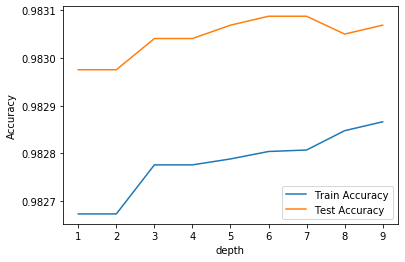

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(depthValues, TrainAccuracy, label="Train Accuracy")
plt.plot(depthValues, TestAccuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("depth")
plt.legend()

Efectivamente fue un método con resultados bastante rápidos, y con un score muy alto en general para cualquier valor de profundidad utilizado. Se podría considerar el valor de 8 como el ideal, porque es cuando ambas curvas se encuentran mas juntas, que es justo lo que queremos para evitar el over y underfitting.

## KNN - K Nearest Neighbors

Contuando con el siguiente método, se procede a utilizar el KNN (K Nearest Neighbords). Es uno de los algoritmos mas simples, y se basa en el grupo o etiquita a la cual pertenencen los vecinos para tomar la decisión de a cual grupo se debe pertenecer.

Este método tiene como hiper parámetro precisamente ese número de vecinos por los cuales se va a consultar. Para determinar cual es el valor mas indicado nuevamente se itera con distintos valores, y se comparan los resultados.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

TrainAccuracy = []
TestAccuracy = []

neighborsValues = [1, 2, 3, 4]
for nb in neighborsValues:
    kNN = KNeighborsClassifier(n_neighbors=nb)
    kNN.fit(FeaturesTrain, LabelsTrain)
    
    TrainAccuracy.append(kNN.score(FeaturesTrain, LabelsTrain))
    TestAccuracy.append(kNN.score(FeaturesTest, LabelsTest))

Nuevamente, se grafica el score obtenido para cada valor de nb utilizado, tanto con los valores de entrenamiento, como con los valores de prueba.

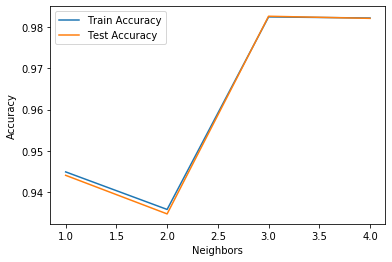

In [32]:
plt.plot(neighborsValues, TrainAccuracy, label="Train Accuracy")
plt.plot(neighborsValues, TestAccuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()

Tal y como las desventajas lo mencionan, es un método que para conjuntos de datos grandes, puede volverse lento, y efectivamente es considerablemente mas lento que el primer metodo, en el cual estamos iterando 10 veces y acá solo 4.

Ahora los resultados obtenidos son de igual manera de mucha calidad. Se observa que la diferencia entre el grupo de entrenamiento y el grupo de prueba es basicamente despreciable. Por lo tanto el valor ideal de nb seriá 3, ya que es donde el score es mas alto.

# Support Vector Classification

Los clasificadores de vector de soporte son métodos que tiene una buena precisión, principalmente ideales cuando el conjunto de datos son pequeños y sencillos. Este método tiene la caracteristica que el tiene su propio mecanismo de iteración con el cual intenta buscar la mayor precisión posible, y una vez que la haya alcanzado finaliza el entrenamiento.

Aun asignando un valor muy alto de iteraciones el método no logra converger. Esto va de la mano con que puede volverse inapropiado para conjuntos de datos muy grandes. Por lo tanto se descarta el uso de este algoritmo.

In [ ]:
from sklearn.svm import LinearSVC

SVC = LinearSVC(random_state=1, max_iter=100000)
SVC.fit(FeaturesTrain, LabelsTrain)

In [25]:
from sklearn.metrics import accuracy_score

LabelsPredict = SVC.predict(FeaturesTest)
accuracy_score(LabelsTest, LabelsPredict)

0.01724879800946626

## Naive Bayes

Este método se basa en el teorema de Bayes. Es un algoritmo que trabaja rápido en conjutos de datos grandes y hay diferentes tipos que se pueden utilizar dependiendo de la naturaleza de los datos. En este caso se utilizará el Multinomial.

Como hiper parámetro utiliza la variable alpha, que se utiliza para suavizar los datos. De igual manera que para los métodos anteriores, se iterará sobre distintos valores de alpha para determinar el mas adecuado.

In [33]:
from sklearn.naive_bayes import MultinomialNB

TrainAccuracy = []
TestAccuracy = []

alphaValues = [0.2, 0.6, 0.8, 1.0]
for alpha in alphaValues:
    NB = MultinomialNB(alpha=alpha)
    NB.fit(FeaturesTrain, LabelsTrain)
    
    TrainAccuracy.append(NB.score(FeaturesTrain, LabelsTrain))
    TestAccuracy.append(NB.score(FeaturesTest, LabelsTest))    

Se grafican los resultados obtenidos para visualizar mas facilmente los diferentes casos.

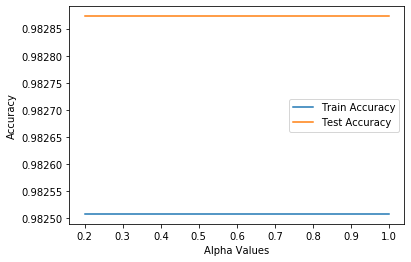

In [28]:
plt.plot(alphaValues, TrainAccuracy, label="Train Accuracy")
plt.plot(alphaValues, TestAccuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Alpha Values")
plt.legend()

Efectivamente es un método bastante ráido y es altamente efectivo. Los resultados obtenidos son muy positivos y basicamente la diferencia entre el conjunto de pruebas y el de entrenamiento es despreciable. Basicamente se puede selecionar cualquier valor de alpha ya que no varía el resultado.

## Stochastic Gradient Descent

Este método tiene la párticularidad, al igual que el SVC de detenerse cuando el mismo determina que los resultados obtenidos no estan cambiando el nivel de exactitud del algoritmo.

Por lo tanto se le indica con el early_stopping que se pretende parar cuando el considere los resultados son los mismos. Se le da un maximo número de iteraciónes y además se le indica que cambie los datos entre cada iteración para asegurarse que el algoritmo ya no se le puede sacar un mejor rendimiento. 

In [38]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(shuffle=True, early_stopping=True, max_iter=1000)
SGD.fit(FeaturesTrain, LabelsTrain)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
LabelsPredict = SGD.predict(FeaturesTest)
accuracy_score(LabelsTest, LabelsPredict)

0.982741847978598

Como ya hemos podido observar con todos los métodos aplicados anteriormente, este conjunto de datos permite un alto nivel exactitud en los resultados. Por lo tanto con pocas iteraciones el método logra encontrar el punto máximo de exactitud y termina muy rapido con muy buenos resultados.

## AdaBoost Classifier

AdaBoost es un método clasificador de tipo ensamble. Los modelos de tipo ensamble utilizan en cooperación varios métodos combinados estrategicamente para lograr mejorar la exactitud del algoritmo. Especificamente el AdaBoost es de tipo boosting.

Los métodos de tipo boosting realizan un entrenamiento inicial sobre un algoritmo, y posteriormente para los algoritmos siguientes se enfoca el entrenamiento en aquellas probes predicciones del algoritmo previo. Se procede entonces a importar de la libreria de ensamble, el método AdaBoostClassifier.

Se utiliza un único hiper parámetro, el cual corresponde al número máximo de aprendices debiles o pobres.

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier(n_estimators=100)
ABC.fit(FeaturesTrain, LabelsTrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [40]:
LabelsPredict = ABC.predict(FeaturesTest)
accuracy_score(LabelsTest, LabelsPredict)

0.983041176360541

El algoritmo tiene la capacidad de igual forma de detenerse cuando los resultados no presenten mejora. El resultado obtenido es muy positivo y en un tiempo realmente rápido.

# Conclusiones

A excepción del método SVC, todos los demas tuvieron un rendimiento realmente acpetable. Al final, el conjunto de datos utilizado no presento mayor rato para los algoritmos. Sin embargo si se ven diferencias bastantes significativas en algunos casos en terminos de tiempo para poder obtener el algoritmo. A pesar de tener buenos resultados siempre se busca poder obtenerlos en la menor cantidad de tiempo posible.